<a href="https://colab.research.google.com/github/narpat78/Image-Classification-using-CNN/blob/main/CIFAR_10_Image_Classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CIFAR-10 Dataset**

The **CIFAR-10** (Canadian Institute for Advanced Research) dataset is a widely used benchmark dataset in computer vision and deep learning. It consists of **60,000 color images** categorized into **10 classes**, with **6,000 images per class**. The dataset is divided into:

- **50,000 training images**
- **10,000 test images**

Each image is **32×32** pixels with **3 color channels (RGB)**. The dataset is often used for training and evaluating image classification models.

**Classes in CIFAR-10**

The dataset includes the following 10 object categories:

1. **Airplane** ✈️
2. **Automobile** 🚗
3. **Bird** 🐦
4. **Cat** 🐱
5. **Deer** 🦌
6. **Dog** 🐶
7. **Frog** 🐸
8. **Horse** 🐴
9. **Ship** 🚢
10. **Truck** 🚚

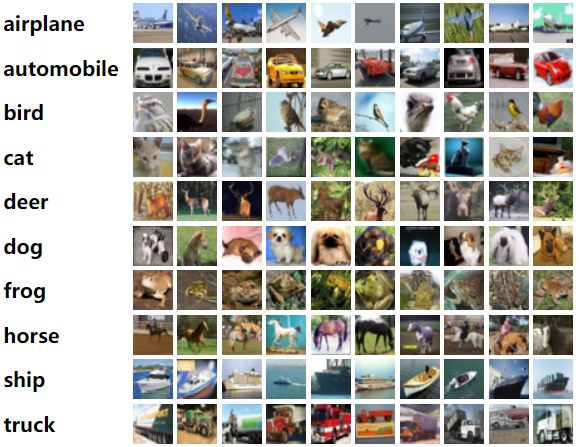

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import cifar10
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from keras.regularizers import l2
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler

In [ ]:
# loading the train and test split
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [ ]:
# analyzing the shape of the loaded sets
print('X_train Shape: ', X_train.shape)
print('y_train Shape: ', y_train.shape)
print('\nX_test Shape: ', X_test.shape)
print('\y_test Shape: ', y_test.shape)

X_test Shape:  (10000, 32, 32, 3)

y_test Shape:  (10000, 1)


In [ ]:
# training and validation split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [ ]:
# analyzing the shape of training and validation sets
print('New Training sets:\nX_train Shape: ', X_train.shape)
print('y_train Shape: ', y_train.shape)
print('\nValidation sets:\nX_valid Shape: ', X_valid.shape)
print('y_valid Shape: ', y_valid.shape)

X_train Shape:  (45000, 32, 32, 3)
X_valid Shape:  (5000, 32, 32, 3)

y_train Shape:  (45000, 1)
y_valid Shape:  (5000, 1)


In [ ]:
import matplotlib.pyplot as plt

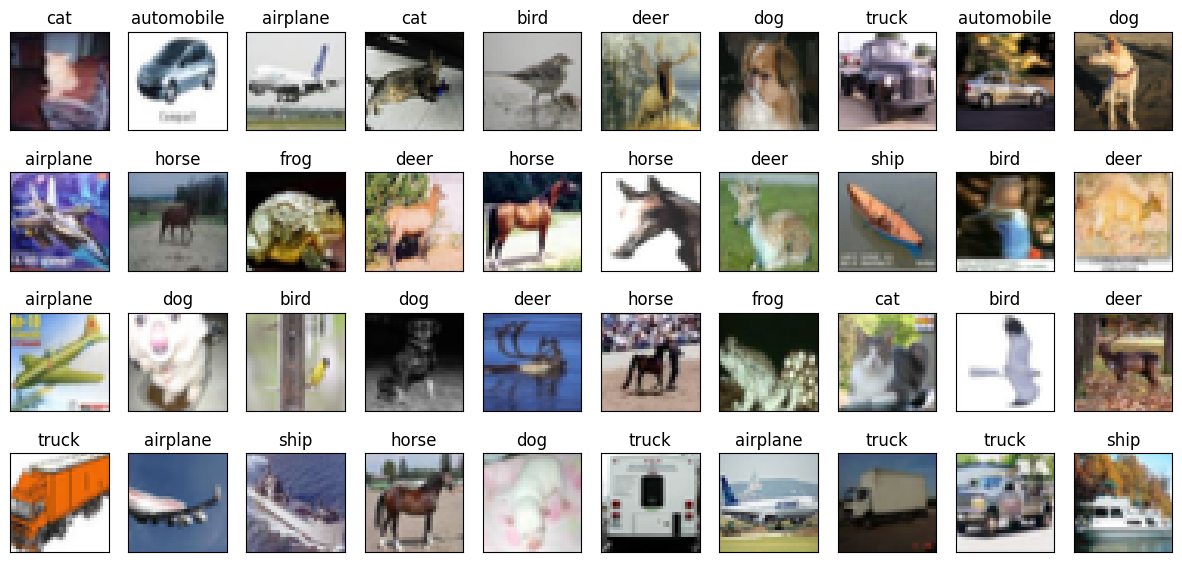

In [ ]:
# CIFAR-10 classes
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# displaying some training examples
plt.figure(figsize=(15,7))
# looping over the first 40 images
for i in range(40):
    # subplot for each image
    plt.subplot(4, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # displaying the image
    plt.imshow(X_train[i])
    # setting the label as the title
    plt.title(class_names[y_train[i][0]], fontsize=12)

# displaying the figure
plt.show()

In [ ]:
# converting the dtype to float32
X_train = X_train.astype('float32')
X_valid = X_valid.astype('float32')
X_test  = X_test.astype('float32')

# # scaling the pixel values of training, validation, and testing set
# X_train_scaled = X_train/255
# X_valid = X_valid/255
# X_test = X_test/255

In [ ]:
import numpy as np

mean = np.mean(X_train)
std  = np.std(X_train)

# Normalize the data
# The tiny value 1e-7 is added to prevent division by zero
X_train = (X_train-mean)/(std+1e-7)
X_test  = (X_test-mean) /(std+1e-7)
X_valid = (X_valid-mean)/(std+1e-7)


# 3 con > 32 64 128 filters


In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same',
                 activation='relu', kernel_regularizer=l2(0.0001), input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same',
                 activation='relu', kernel_regularizer=l2(0.0001)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same',
                 activation='relu', kernel_regularizer=l2(0.0001)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_28 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_28 (MaxPooling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_28               │ (None, 16, 16, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_30 (Dropout)                 │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_29 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_29               │ (None, 8, 8, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_31 (Dropout)                 │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_30 (MaxPooling2D)      │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_30               │ (None, 4, 4, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_32 (Dropout)                 │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_31 (MaxPooling2D)      │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_31               │ (None, 2, 2, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_33 (Dropout)                 │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_34 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 205,898 (804.29 KB)

 Trainable params: 205,322 (802.04 KB)

 Non-trainable params: 576 (2.25 KB)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping

callback = EarlyStopping(
    monitor = 'val_loss',
    patience = 10,
    restore_best_weights = True,
    verbose = 1
)

In [ ]:
# history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid,y_valid),
                    # batch_size=32, verbose=1)

history = model.fit(X_train, y_train, epochs=100, validation_split=0.2,
                    batch_size=32, verbose=1)
# print('Training Completed.')

Epoch 1/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.3566 - loss: 1.7977 - val_accuracy: 0.5722 - val_loss: 1.1898
Epoch 2/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.5587 - loss: 1.2367 - val_accuracy: 0.6352 - val_loss: 1.0274
Epoch 3/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6317 - loss: 1.0577 - val_accuracy: 0.6841 - val_loss: 0.9222
Epoch 4/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6735 - loss: 0.9523 - val_accuracy: 0.6969 - val_loss: 0.8888
Epoch 5/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7008 - loss: 0.8829 - val_accuracy: 0.7190 - val_loss: 0.8290
Epoch 6/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7209 - loss: 0.8297 - val_accuracy: 0.7403 - val_loss: 0.7745
Epoch 7/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7369 - loss: 0.7903 - val_accuracy: 0.7547 - val_loss: 0.7391
Epoch 8/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7539 - loss: 

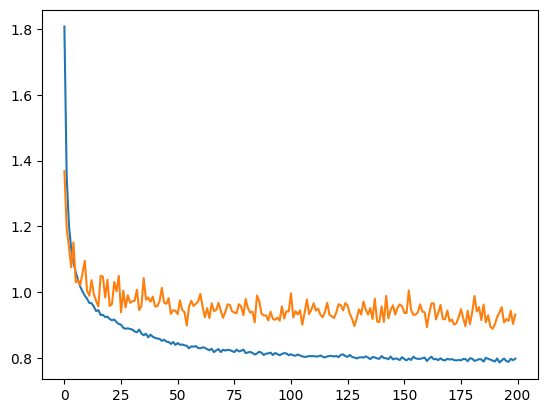

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

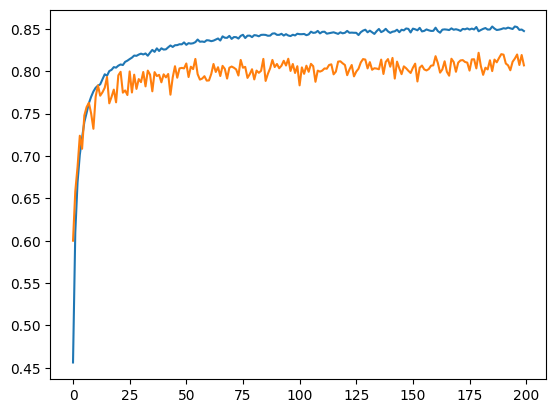

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

print('Test Accuracy:', test_acc)
print('Test Loss:    ', test_loss)

Test Accuracy: 0.8288999795913696
Test Loss:     0.669143795967102
